<a href="https://colab.research.google.com/github/Nicoch590/DatosFinancieros/blob/main/Datos_Financieros_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import missingno as msno
#msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

In [4]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicoch590/DatosFinancieros/main/datos_financieros_reducidos.csv',index_col=[0])
df.head()

,Ticker,Revenue,Revenue_Growth,Gross_Profit,Net_Income,Dividend_per_Share,EBITDA,priceSalesRatio,dividendYield,enterpriseValueMultiple,returnOnAssets,returnOnEquity,debtRatio,debtEquityRatio,PE_ratio,EV_to_Sales,Enterprise_Value_over_EBITDA,Graham_Net-Net,EPS_Growth,priceEarningsRatio,priceToFreeCashFlowsRatio,EPS,Gross_Margin,EBITDA_Margin,priceEarningsToGrowthRatio,priceToSalesRatio,Net_Profit_Margin,Sector,2015_PRICE_VAR_[%],Class,year,2016_PRICE_VAR_[%],2017_PRICE_VAR_[%],2018_PRICE_VAR_[%],2019_PRICE_VAR_[%],AnualPriceVariation
0,PG,7.440100e+10,-0.0713,3.537100e+10,1.164300e+10,2.448,1.834400e+10,2.434644,0.038153,11.421116,0.5765,0.1664,0.2455,0.5061,18.7566,3.1907,12.9411,-0.2007,0.0371,18.7566,21.0348,4.1900,0.4754,0.2470,15.557842,2.8583,0.1565,Consumer Defensive,-9.323276,0,2014,NaN,NaN,NaN,NaN,-9.323276
1,VIPS,3.734148e+09,1.1737,9.285226e+08,1.358227e+08,0.000,2.456858e+08,0.095727,-0.000000,7.136538,0.0403,0.3294,0.2274,1.5093,81.5526,NaN,NaN,0.0534,1.4625,81.5526,1.3589,0.2396,0.2487,0.0107,2.631793,0.0443,0.0364,Consumer Defensive,-25.512193,0,2014,NaN,NaN,NaN,NaN,-25.512193
2,KR,9.837500e+10,0.0182,2.023700e+10,1.519000e+09,0.307,4.416000e+09,0.000000,NaN,2.276721,0.1011,0.2821,0.3863,2.1007,12.0340,0.2967,6.6086,-0.8239,0.0576,12.0340,14.6302,1.4700,0.2057,0.0450,0.000000,0.1858,0.0154,Consumer Defensive,33.118297,1,2014,NaN,NaN,NaN,NaN,33.118297
3,RAD,2.552641e+10,0.0053,7.323734e+09,2.494140e+08,0.000,1.078550e+09,0.000000,NaN,5.428005,0.0668,-0.1180,0.8290,-2.7237,28.6087,0.4689,11.0987,-0.7506,0.9167,28.6087,17.2736,4.6000,0.2869,0.0420,0.000000,0.2491,0.0098,Consumer Defensive,2.752291,1,2014,NaN,NaN,NaN,NaN,2.752291
4,GIS,1.790960e+10,0.0076,6.369800e+09,1.824400e+09,1.550,3.595500e+09,1.553911,0.035332,9.767966,0.6265,0.2792,0.3796,1.3445,18.7034,2.3032,11.4723,-0.3229,0.0140,18.7034,17.6902,2.9000,0.3557,0.2010,15.254287,1.8610,0.1019,Consumer Defensive,12.897715,1,2014,NaN,NaN,NaN,NaN,12.897715


In [44]:
seleccion_indicadores=['Revenue_Growth',
                          'Gross_Profit',
                          'priceEarningsRatio',
                          'priceToFreeCashFlowsRatio',
                          'EPS',
                          'Gross_Margin',
                          'EBITDA_Margin',                          
                          'priceToSalesRatio',
                          'Net_Profit_Margin']

In [7]:
# Eliminación de valores atípicos
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = ((interesting_col <= (interesting_col.quantile(.98))) & (interesting_col >= (interesting_col.quantile(.01))))
        #numpy.abs(interesting_col - interesting_col.mean()) <= (0.02 * interesting_col.std()))
    return dataset[mask_outlier]


La funcion Clean_outliers, filtra los valores situados por encima del perncentil 98% y por debajo del percentil 1% de la variable seleccionada.

## Indicadores Seleccionados

### Revenue Growth: 
es la variacion de las ventas de la compania en un periodo determinado.

Revenue Growth = (revenue periodo actual-revenue periodo anterior)/revenue periodo anterior.

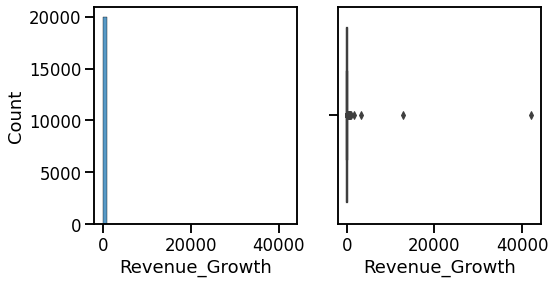

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df['Revenue_Growth'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df['Revenue_Growth'], ax= axes[1])


Pueden verse algunos valores extremos para este indicador, utilizamos la funcion clean_outliers

In [9]:
df_1=df.copy()

In [10]:
df_1=clean_outliers(df_1,seleccion_indicadores[0])

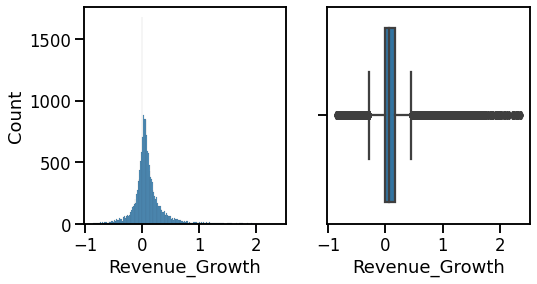

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_1['Revenue_Growth'], ax= axes[0])
g = seaborn.boxplot(x= df_1['Revenue_Growth'], ax= axes[1])

In [12]:
df_1[seleccion_indicadores[0]].describe()

count    19389.000000
mean         0.109654
std          0.322502
min         -0.861700
25%         -0.013600
50%          0.055800
75%          0.172300
max          2.369800
Name: Revenue_Growth, dtype: float64

### Gross Profit 
(Beneficio Bruto)
Es el beneficio de la empresa luego de deducir los costos asociados al producto o servicio.

GP= Revenue - COGS

COGS: cost of goods sold, incluye solo los costos variables y no los costos fijos.

Evalua la eficiencia de la empresa para producir bienes y servicios.


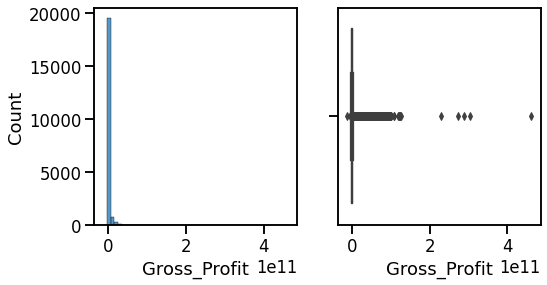

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df[seleccion_indicadores[1]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[1]], ax= axes[1])

Aplicamos la funcion Clean_Outliers

In [14]:
df_1=clean_outliers(df_1,seleccion_indicadores[1])

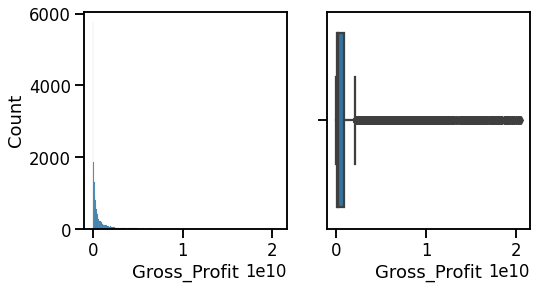

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_1[seleccion_indicadores[1]].dropna(), ax= axes[0])
g = seaborn.boxplot(x= df_1[seleccion_indicadores[1]], ax= axes[1])

In [16]:
df_1[seleccion_indicadores[1]].describe()

count    1.880500e+04
mean     1.120868e+09
std      2.607238e+09
min     -1.349440e+06
25%      3.820700e+07
50%      2.106400e+08
75%      8.610000e+08
max      2.057000e+10
Name: Gross_Profit, dtype: float64

In [17]:
#df_1[(df_1[seleccion_indicadores[1]] >= -2.5e-6)&(df_1[seleccion_indicadores[1]] <= 2.5e6)]

plt.figure(figsize=(15,6))
seaborn.barplot(data=df_1[[seleccion_indicadores[1],
                           'Sector']],
                y=df_1[seleccion_indicadores[1]],
                x=df_1['Sector'])
plt.xticks(rotation=30)

### Price to Earnings Ratio

The price-earnings ratio (P/E ratio) relates a company's share price to its earnings per share.
A high P/E ratio could mean that a company's stock is over-valued, or else that investors are expecting high growth rates in the future.
Companies that have no earnings or that are losing money do not have a P/E ratio since there is nothing to put in the denominator.
Two kinds of P/E ratios - forward and trailing P/E - are used in practice.
P/E Ratio= Market value per share /Earnings per share

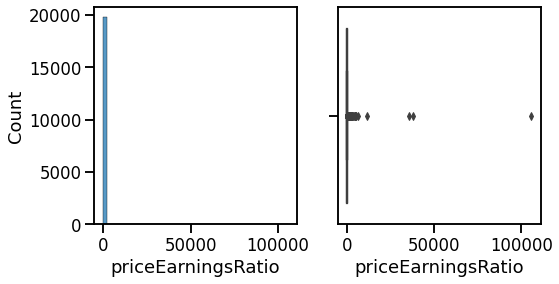

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df[seleccion_indicadores[2]], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df[seleccion_indicadores[2]], ax= axes[1])

In [19]:
df_1=clean_outliers(df_1,seleccion_indicadores[2])

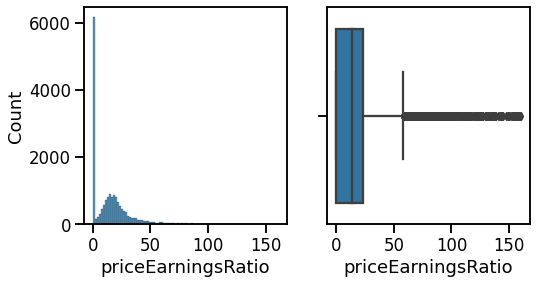

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_1[seleccion_indicadores[2]], ax= axes[0])
g = seaborn.boxplot(x= df_1[seleccion_indicadores[2]], ax= axes[1])

In [21]:
df_1[seleccion_indicadores[2]].describe()

count    18131.000000
mean        17.120813
std         21.913945
min          0.000000
25%          0.000000
50%         13.203700
75%         23.043950
max        160.285700
Name: priceEarningsRatio, dtype: float64

## Cantidad Registros por Año

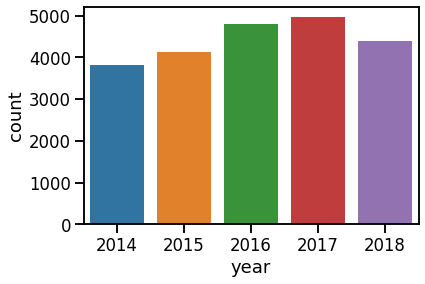

In [22]:
seaborn.countplot(data=df_1, x=df.year)

## Registros por Sector

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

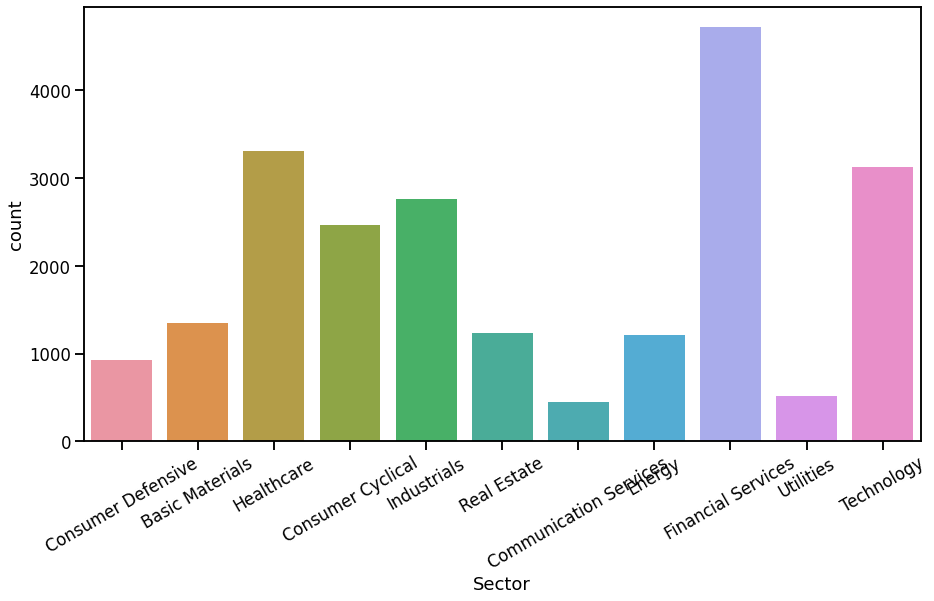

In [23]:
fig = plt.figure(figsize=(15,8))
seaborn.countplot(data=df, x=df.Sector)
plt.xticks(rotation=30)

## Analisis Variacion anual de precios

### Distribucion Price Var

In [24]:
Pvar='AnualPriceVariation'

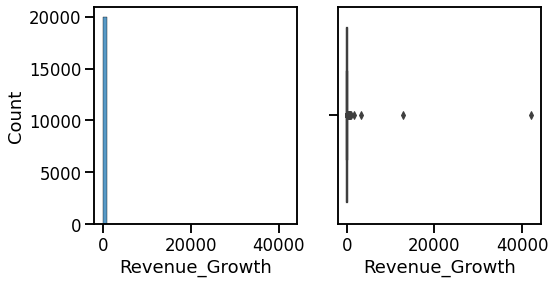

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df['Revenue_Growth'], bins= 50, ax= axes[0])
g = seaborn.boxplot(x= df['Revenue_Growth'], ax= axes[1])

En el boxplot de PVAR se observa algunos valores extremos, utilizamos la funcion clean ouliers para eliminarlos.

In [31]:
df_1=clean_outliers(df_1,Pvar)

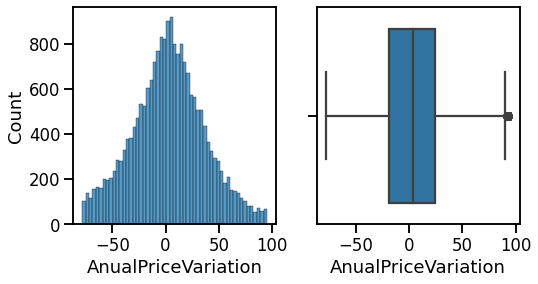

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
g = seaborn.histplot(x= df_1[Pvar], ax= axes[0])
g = seaborn.boxplot(x= df_1[Pvar], ax= axes[1])

Observando el grafico la distribucion parece ser normal, calculamos las medidas desriptivas.

In [33]:
df_1[Pvar].describe()

count    20770.000000
mean         3.018824
std         33.856199
min        -78.037384
25%        -18.812076
50%          3.257760
75%         24.684458
max         95.093457
Name: AnualPriceVariation, dtype: float64

**Prueba de Hipotesis?**

### **Distribución de PRICE VAR agrupados por año y por sector**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

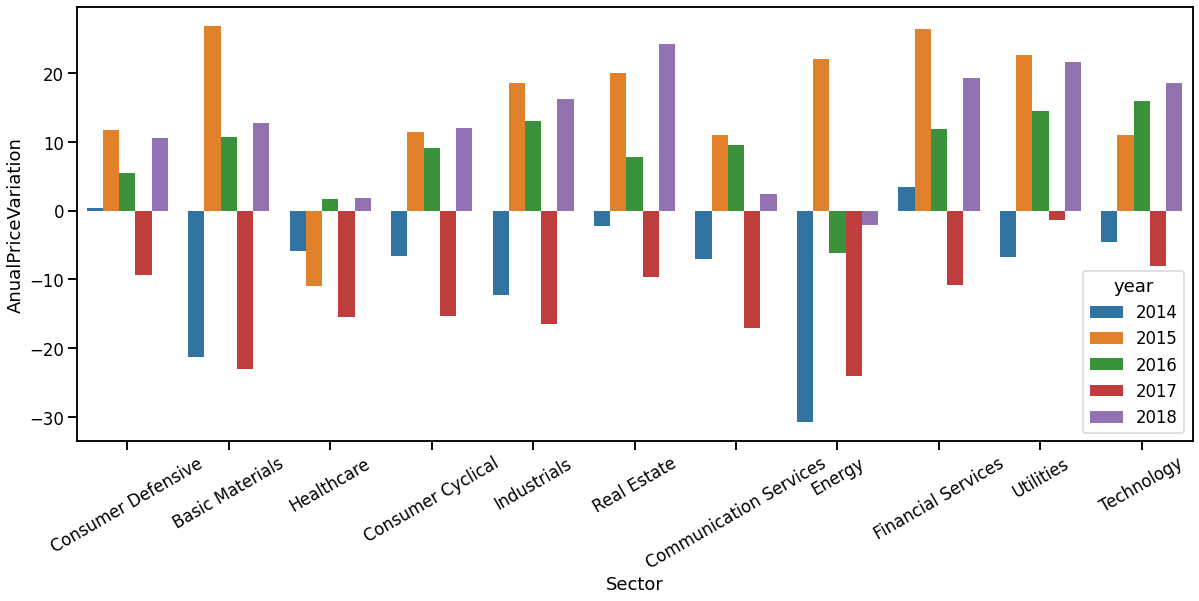

In [34]:
fig = plt.figure(figsize=(20,8))
seaborn.barplot(data=df_1, x=df_1.Sector,y=df_1.AnualPriceVariation,ci=None,estimator=numpy.mean, hue=df_1.year)
plt.xticks(rotation=30)

### Matriz de correlación entre indicadores 

In [45]:
seleccion_indicadores

['Revenue_Growth',
 'Gross_Profit',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'EPS',
 'Gross_Margin',
 'EBITDA_Margin',
 'priceToSalesRatio',
 'Net_Profit_Margin']

In [47]:
seleccion_indicadores_Pvar= seleccion_indicadores.copy()
seleccion_indicadores_Pvar.append(Pvar)
print(seleccion_indicadores_Pvar)

['Revenue_Growth', 'Gross_Profit', 'priceEarningsRatio', 'priceToFreeCashFlowsRatio', 'EPS', 'Gross_Margin', 'EBITDA_Margin', 'priceToSalesRatio', 'Net_Profit_Margin', 'AnualPriceVariation']


In [49]:
df_corr = df_1[seleccion_indicadores_Pvar].corr()
print(df_corr)

                           Revenue_Growth  ...  AnualPriceVariation
Revenue_Growth                   1.000000  ...            -0.009888
Gross_Profit                    -0.002991  ...             0.029752
priceEarningsRatio              -0.001913  ...             0.016117
priceToFreeCashFlowsRatio       -0.000674  ...             0.002207
EPS                             -0.000003  ...             0.001156
Gross_Margin                     0.000165  ...             0.056075
EBITDA_Margin                    0.000217  ...             0.021507
priceToSalesRatio               -0.000248  ...            -0.017995
Net_Profit_Margin                0.000283  ...             0.022629
AnualPriceVariation             -0.009888  ...             1.000000

[10 rows x 10 columns]


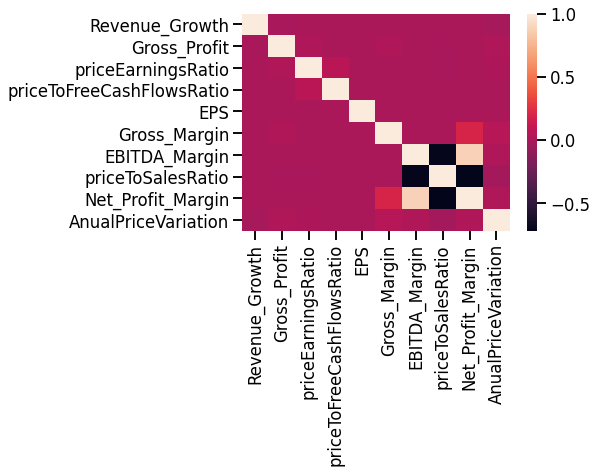

In [50]:
seaborn.heatmap(df_corr)